# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [ ]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')

### Step 3. Assign it to a variable apple

In [ ]:
# I already did that.
apple.tail(5) # Just to see the data.

,Date,Open,High,Low,Close,Volume,Adj Close
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


### Step 4.  Check out the type of the columns

In [ ]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [ ]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [ ]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [ ]:
apple.loc[apple.index.duplicated() == True]
# The answer is no.

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple.sort_index(ascending = False)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 9. Get the last business day of each month

In [ ]:
# Create the column day_of_week.
apple['day_of_week'] = apple.index.dayofweek

In [ ]:
# Filter by weekdays.
apple = apple.loc[apple.day_of_week < 5]

In [ ]:
# Group by the YM of each date and apply the func head to each group to bring the last day of the month.
apple.groupby(apple.index.strftime('%Y-%m')).head(1).head(10)

,Open,High,Low,Close,Volume,Adj Close,day_of_week
Date,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,1
2014-06-30,92.10,93.73,92.09,92.93,49482300,92.93,0
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43,4
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83,2
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25,0
2014-02-28,529.08,532.75,522.12,526.24,92992200,74.76,4
2014-01-31,495.18,501.53,493.55,500.60,116199300,70.69,4
2013-12-31,554.17,561.28,554.00,561.02,55771100,79.23,1
2013-11-29,549.48,558.33,547.81,556.07,79531900,78.53,4


In [ ]:
# This is a simplified way:

apple_month = apple.resample('BM').mean()

apple_month.tail(10).sort_index(ascending = False)

,Open,High,Low,Close,Volume,Adj Close,day_of_week
Date,,,,,,,
2014-07-31,94.29,95.00,93.49,94.47,"42,183,660.00",94.47,1.40
2014-06-30,222.36,224.08,220.74,222.66,"57,455,061.90",91.89,1.90
2014-05-30,601.30,606.37,598.33,603.20,"68,281,766.67",86.06,2.24
2014-04-30,540.08,544.35,536.26,541.07,"76,607,866.67",76.87,1.86
2014-03-31,533.59,536.45,530.07,533.21,"59,544,033.33",75.75,1.90
2014-02-28,525.72,530.77,522.13,526.58,"77,373,247.37",74.74,2.11
2014-01-31,538.10,542.84,533.07,537.45,"104,356,600.00",75.90,2.24
2013-12-31,560.65,564.36,556.41,559.66,"84,016,633.33",79.03,1.86
2013-11-29,523.22,527.83,520.22,524.62,"65,314,445.00",74.02,2.05


### Step 10.  What is the difference in days between the first day and the oldest

In [ ]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [ ]:
apple.resample('M').mean()['Open'].count()

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

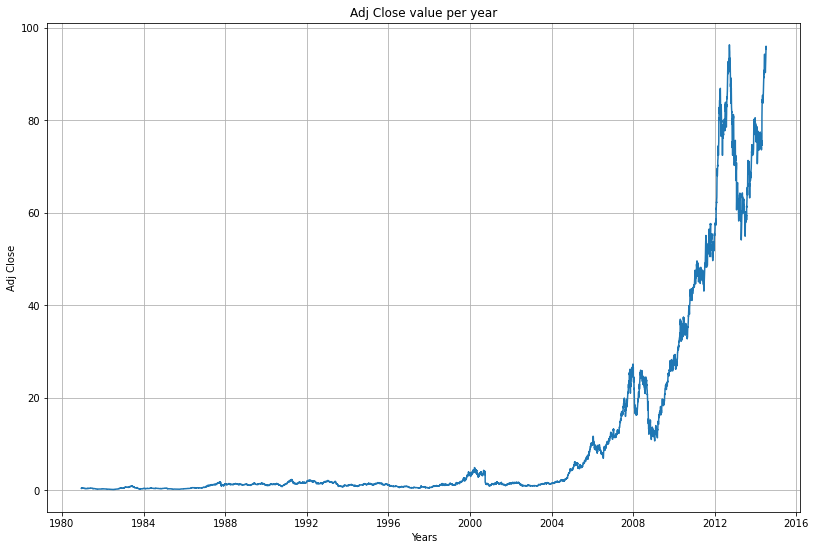

In [ ]:
fig, ax = plt.subplots(figsize = (13.5, 9))
ax.plot(apple['Adj Close'])
plt.ylabel('Adj Close')
plt.xlabel('Years')
plt.title('Adj Close value per year')
plt.grid()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fe744348-fecc-4b7a-803c-44dba24ecb38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>